In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

## DATA PREPROCESSING

In [ ]:
city = pd.read_csv('city_hour.csv')

In [ ]:
city.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [ ]:
city['City'].nunique()

26

### DATA CLEANING

In [ ]:
city.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [ ]:
# portion missing values considering all column
((city.shape[0] - city.dropna().shape[0])/city.shape[0])*100

81.73731237859792

AQI Category (Range)
- Good (0-50)
- Satisfactory (51-100)
- Moderate (101-200)
- Poor (201-300)
- Very poor (301-400)
- Severe (401-500)

In [ ]:
city['PM2.5']=city['PM2.5'].fillna((city['PM2.5'].median()))
city['PM10']=city['PM10'].fillna((city['PM10'].median()))
city['NO']=city['NO'].fillna((city['NO'].median()))
city['NO2']=city['NO2'].fillna((city['NO2'].median()))
city['NOx']=city['NOx'].fillna((city['NOx'].median()))
city['NH3']=city['NH3'].fillna((city['NH3'].median()))
city['CO']=city['CO'].fillna((city['CO'].median()))
city['SO2']=city['SO2'].fillna((city['SO2'].median()))
city['O3']=city['O3'].fillna((city['O3'].median()))
city['Benzene']=city['Benzene'].fillna((city['Benzene'].median()))
city['Toluene']=city['Toluene'].fillna((city['Toluene'].median()))
city['Xylene']=city['Xylene'].fillna((city['Xylene'].median()))
city['AQI']=city['AQI'].fillna((city['AQI'].median()))
city['AQI_Bucket']=city['AQI_Bucket'].fillna('Moderate')

In [ ]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       707875 non-null  float64
 3   PM10        707875 non-null  float64
 4   NO          707875 non-null  float64
 5   NO2         707875 non-null  float64
 6   NOx         707875 non-null  float64
 7   NH3         707875 non-null  float64
 8   CO          707875 non-null  float64
 9   SO2         707875 non-null  float64
 10  O3          707875 non-null  float64
 11  Benzene     707875 non-null  float64
 12  Toluene     707875 non-null  float64
 13  Xylene      707875 non-null  float64
 14  AQI         707875 non-null  float64
 15  AQI_Bucket  707875 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [ ]:
city.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
city.duplicated().sum()

0

In [ ]:
city.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,46.42,91.5,1.00,40.01,36.37,15.38,1.00,122.07,26.24,0.0,0.0,0.0,116.0,Moderate
1,Ahmedabad,2015-01-01 02:00:00,46.42,91.5,0.02,27.75,19.73,15.38,0.02,85.90,26.24,0.0,0.0,0.0,116.0,Moderate
2,Ahmedabad,2015-01-01 03:00:00,46.42,91.5,0.08,19.32,11.08,15.38,0.08,52.83,26.24,0.0,0.0,0.0,116.0,Moderate
3,Ahmedabad,2015-01-01 04:00:00,46.42,91.5,0.30,16.45,9.20,15.38,0.30,39.53,153.58,0.0,0.0,0.0,116.0,Moderate
4,Ahmedabad,2015-01-01 05:00:00,46.42,91.5,0.12,14.90,7.85,15.38,0.12,32.63,26.24,0.0,0.0,0.0,116.0,Moderate


In [ ]:
import datetime as dt

In [ ]:
city['Datetime'] = pd.to_datetime(city['Datetime'])
city['year'] = city['Datetime'].dt.year
city['month'] =city['Datetime'].dt.month
city['time'] =city['Datetime'].dt.time
city ['week'] =city['Datetime'].dt.week
city ['day'] =city['Datetime'].dt.day
city.drop('Datetime',axis=1,inplace=True)

In [ ]:
city.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,time,week,day
0,Ahmedabad,46.42,91.5,1.00,40.01,36.37,15.38,1.00,122.07,26.24,0.0,0.0,0.0,116.0,Moderate,2015,1,01:00:00,1,1
1,Ahmedabad,46.42,91.5,0.02,27.75,19.73,15.38,0.02,85.90,26.24,0.0,0.0,0.0,116.0,Moderate,2015,1,02:00:00,1,1
2,Ahmedabad,46.42,91.5,0.08,19.32,11.08,15.38,0.08,52.83,26.24,0.0,0.0,0.0,116.0,Moderate,2015,1,03:00:00,1,1
3,Ahmedabad,46.42,91.5,0.30,16.45,9.20,15.38,0.30,39.53,153.58,0.0,0.0,0.0,116.0,Moderate,2015,1,04:00:00,1,1
4,Ahmedabad,46.42,91.5,0.12,14.90,7.85,15.38,0.12,32.63,26.24,0.0,0.0,0.0,116.0,Moderate,2015,1,05:00:00,1,1


In [ ]:
city['week'].nunique()

53

In [ ]:
city['year'].nunique()

6

In [ ]:
numericals = ['PM2.5', 'PM10', 'NO', 'NO', 'NO2', 'NOx',
              'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
              'Xylene', 'AQI', 'year', 'month', 'week']

categoricals = ['City', 'AQI_Bucket', 'time']

In [ ]:
city[numericals].describe()

,PM2.5,PM10,NO,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,year,month,week
count,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000
mean,63.277170,107.516191,15.862803,15.862803,27.468002,30.286116,20.440077,2.014442,12.994346,33.236714,2.572621,6.768942,1.623372,157.220670,2017.886277,6.266540,25.480812
std,67.180795,80.587300,29.541480,29.541480,26.830097,36.393065,22.962005,10.288245,17.575227,27.151205,14.460070,18.255729,4.807554,147.875781,1.533115,3.433097,14.943341
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000,2015.000000,1.000000,1.000000
25%,30.980000,79.570000,4.570000,4.570000,12.420000,12.820000,12.270000,0.480000,5.560000,16.150000,0.200000,1.150000,0.790000,87.000000,2017.000000,3.000000,13.000000
50%,46.420000,91.500000,7.960000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000,2018.000000,6.000000,24.000000
75%,68.240000,102.830000,13.340000,13.340000,31.850000,32.270000,19.680000,1.250000,12.740000,41.500000,2.000000,5.030000,0.790000,177.000000,2019.000000,9.000000,38.000000
max,999.990000,1000.000000,499.990000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000,2020.000000,12.000000,53.000000


In [ ]:
city[categoricals].describe()

,City,AQI_Bucket,time
count,707875,707875,707875
unique,26,6,24
top,Ahmedabad,Moderate,00:00:00
freq,48192,328071,29505


In [ ]:
map_City = {
    'Ahmedabad' : 1,
    'Aizawl' : 2,
    'Amaravati' : 3,
    'Amritsar' : 4,
    'Bengaluru' : 5,
    'Bhopal' : 6,
    'Brajrajnagar' : 7,
    'Chandigarh'  : 8,
    'Chennai' : 9,
    'Coimbatore' : 10,
    'Delhi' : 11,
    'Ernakulam' : 12,
    'Gurugram' : 13,
    'Guwahati' : 14,
    'Hyderabad' : 15,
    'Jaipur' : 16,
    'Jorapokhar' : 17,
    'Kochi' : 18,
    'Kolkata' : 19,
    'Lucknow' : 20,
    'Mumbai' : 21,
    'Patna' : 22,
    'Shillong' : 23,
    'Talcher' : 24,
    'Thiruvananthapuram' : 25,
    'Visakhapatnam' : 26
    }
city['city_lencode'] = city['City'].map(map_City)
city[['City', 'city_lencode']]

,City,city_lencode
0,Ahmedabad,1
1,Ahmedabad,1
2,Ahmedabad,1
3,Ahmedabad,1
4,Ahmedabad,1
...,...,...
707870,Visakhapatnam,26
707871,Visakhapatnam,26
707872,Visakhapatnam,26
707873,Visakhapatnam,26


In [ ]:
map_AQI = {
    'Good' :6,
    'Satisfactory' :5,
    'Moderate' :4,
    'Poor' : 3,
    'Very poor' :2,
    'Severe' :1
    }
city['AQI_lencode'] = city['AQI_Bucket'].map(map_AQI)
city[['AQI_Bucket', 'AQI_lencode']]

,AQI_Bucket,AQI_lencode
0,Moderate,4.0
1,Moderate,4.0
2,Moderate,4.0
3,Moderate,4.0
4,Moderate,4.0
...,...,...
707870,Satisfactory,5.0
707871,Satisfactory,5.0
707872,Good,6.0
707873,Good,6.0


In [ ]:
city

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,year,month,time,week,day,city_lencode,AQI_lencode
0,Ahmedabad,46.42,91.50,1.00,40.01,36.37,15.38,1.00,122.07,26.24,...,0.00,116.0,Moderate,2015,1,01:00:00,1,1,1,4.0
1,Ahmedabad,46.42,91.50,0.02,27.75,19.73,15.38,0.02,85.90,26.24,...,0.00,116.0,Moderate,2015,1,02:00:00,1,1,1,4.0
2,Ahmedabad,46.42,91.50,0.08,19.32,11.08,15.38,0.08,52.83,26.24,...,0.00,116.0,Moderate,2015,1,03:00:00,1,1,1,4.0
3,Ahmedabad,46.42,91.50,0.30,16.45,9.20,15.38,0.30,39.53,153.58,...,0.00,116.0,Moderate,2015,1,04:00:00,1,1,1,4.0
4,Ahmedabad,46.42,91.50,0.12,14.90,7.85,15.38,0.12,32.63,26.24,...,0.00,116.0,Moderate,2015,1,05:00:00,1,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,9.50,36.00,2.75,25.57,15.85,4.57,0.62,8.37,27.75,...,0.79,51.0,Satisfactory,2020,6,20:00:00,27,30,26,5.0
707871,Visakhapatnam,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,...,0.79,51.0,Satisfactory,2020,6,21:00:00,27,30,26,5.0
707872,Visakhapatnam,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,...,0.79,50.0,Good,2020,6,22:00:00,27,30,26,6.0
707873,Visakhapatnam,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,...,0.79,50.0,Good,2020,6,23:00:00,27,30,26,6.0


In [ ]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   City          707875 non-null  object 
 1   PM2.5         707875 non-null  float64
 2   PM10          707875 non-null  float64
 3   NO            707875 non-null  float64
 4   NO2           707875 non-null  float64
 5   NOx           707875 non-null  float64
 6   NH3           707875 non-null  float64
 7   CO            707875 non-null  float64
 8   SO2           707875 non-null  float64
 9   O3            707875 non-null  float64
 10  Benzene       707875 non-null  float64
 11  Toluene       707875 non-null  float64
 12  Xylene        707875 non-null  float64
 13  AQI           707875 non-null  float64
 14  AQI_Bucket    707875 non-null  object 
 15  year          707875 non-null  int64  
 16  month         707875 non-null  int64  
 17  time          707875 non-null  object 
 18  week

In [ ]:
city.isnull().sum()

City                0
PM2.5               0
PM10                0
NO                  0
NO2                 0
NOx                 0
NH3                 0
CO                  0
SO2                 0
O3                  0
Benzene             0
Toluene             0
Xylene              0
AQI                 0
AQI_Bucket          0
year                0
month               0
time                0
week                0
day                 0
city_lencode        0
AQI_lencode     57455
dtype: int64

In [ ]:
city['AQI_lencode']=city['AQI_lencode'].fillna((city['AQI_lencode'].median()))

## EXPLORATORY DATA ANALYSIS

### Which are top 10 cities for high average PM 2.5 level

In [ ]:
# City which highest PM2.5
pm2 = city.groupby(['City']).mean().round()['PM2.5']
pm2

City
Ahmedabad              60.0
Aizawl                 25.0
Amaravati              40.0
Amritsar               53.0
Bengaluru              37.0
Bhopal                 50.0
Brajrajnagar           60.0
Chandigarh             42.0
Chennai                50.0
Coimbatore             33.0
Delhi                 117.0
Ernakulam              28.0
Gurugram              104.0
Guwahati               61.0
Hyderabad              47.0
Jaipur                 55.0
Jorapokhar             51.0
Kochi                  33.0
Kolkata                63.0
Lucknow               106.0
Mumbai                 42.0
Patna                 102.0
Shillong               34.0
Talcher                58.0
Thiruvananthapuram     31.0
Visakhapatnam          47.0
Name: PM2.5, dtype: float64

In [ ]:
pm2.sort_values(ascending=False).head(10)

City
Delhi           117.0
Lucknow         106.0
Gurugram        104.0
Patna           102.0
Kolkata          63.0
Guwahati         61.0
Ahmedabad        60.0
Brajrajnagar     60.0
Talcher          58.0
Jaipur           55.0
Name: PM2.5, dtype: float64

<Axes: xlabel='City', ylabel='PM2.5'>

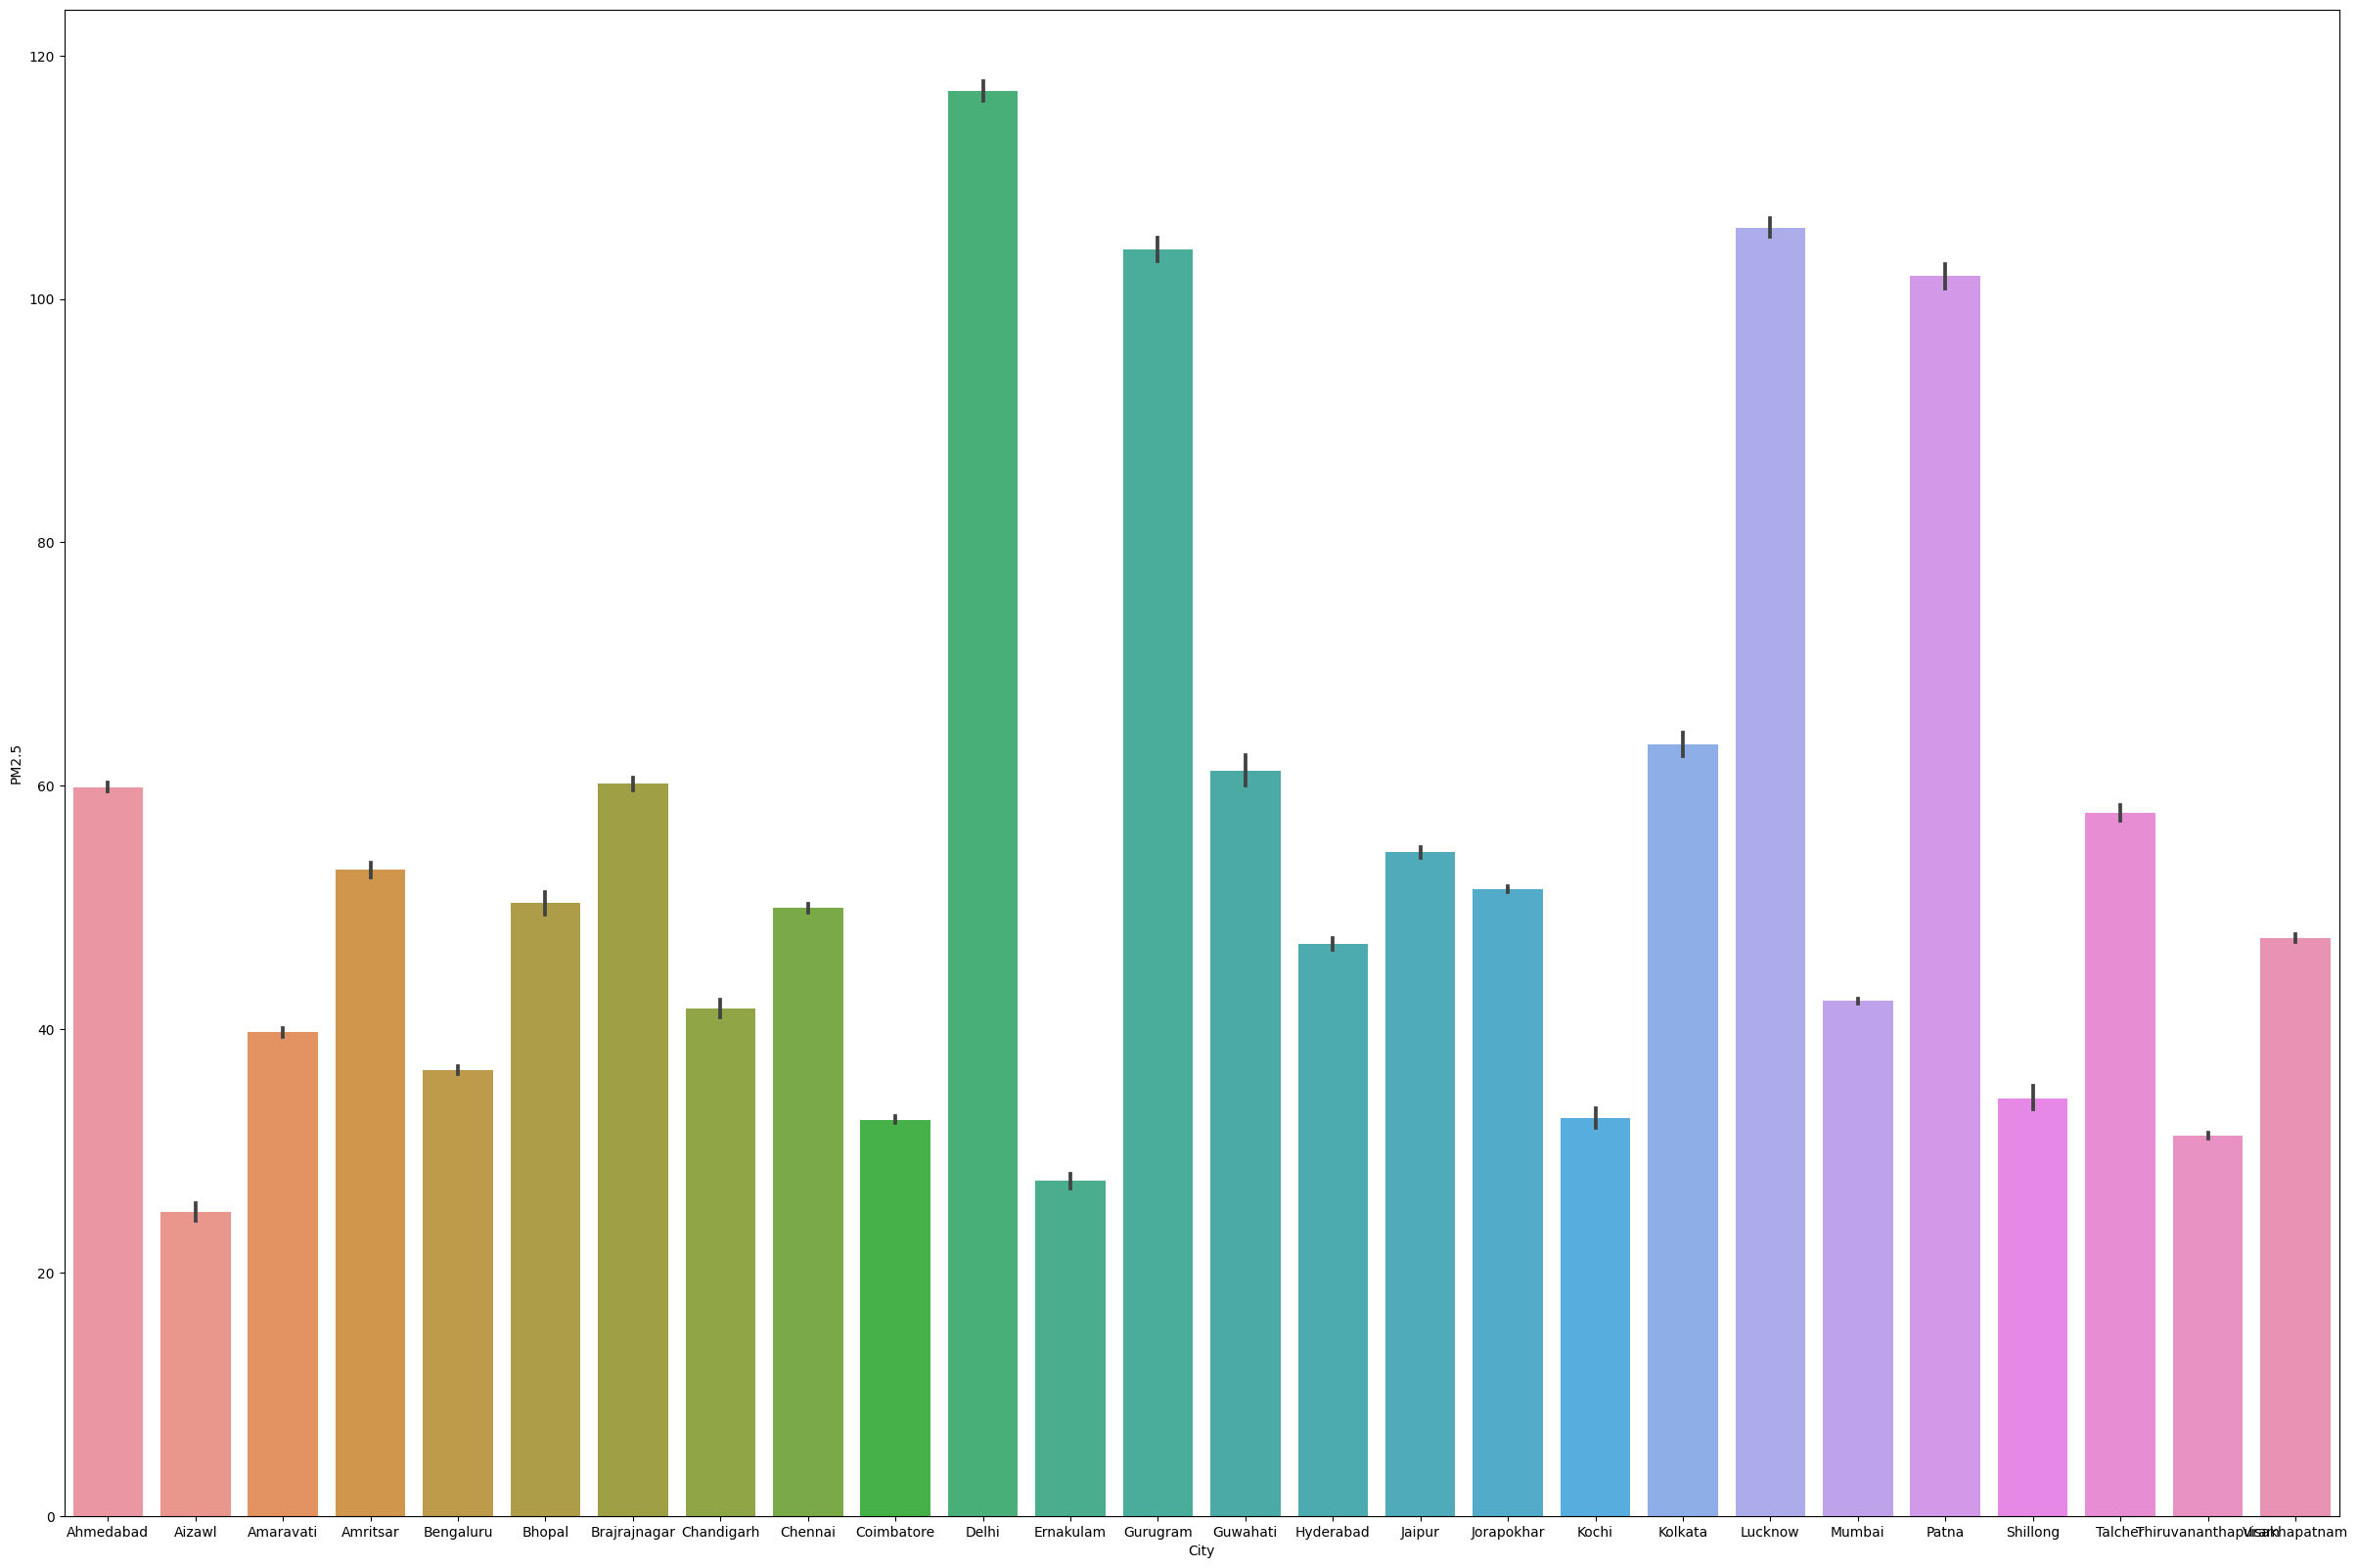

In [ ]:
import seaborn as sns
plt.figure(figsize = (30,20))

sns.barplot(x = 'City', y = 'PM2.5', data = city)

<Axes: title={'center': 'PM 2.5 Levels in different cities'}, xlabel='Level', ylabel='City'>

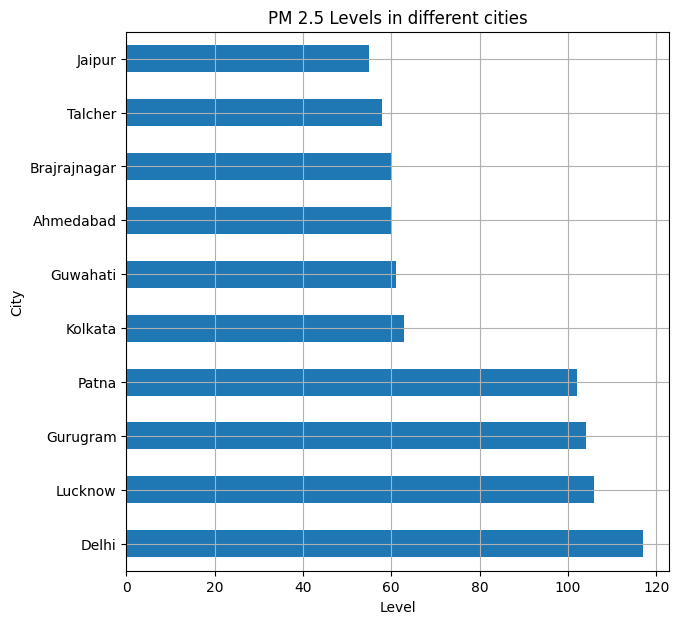

In [ ]:
pm2.sort_values(ascending=False).head(10) .plot(figsize=(7,7),
                                    kind="barh",
                                    title="PM 2.5 Levels in different cities",
                                    xlabel="Level", ylabel="City",grid=True)

### Which are top 10 cities for high average PM 10 level

In [ ]:
# City which highest PM10
pm10=city.groupby(['City']).mean().round()['PM10']
pm10

City
Ahmedabad              95.0
Aizawl                 34.0
Amaravati              79.0
Amritsar              112.0
Bengaluru              85.0
Bhopal                119.0
Brajrajnagar          116.0
Chandigarh             86.0
Chennai                88.0
Coimbatore             48.0
Delhi                 226.0
Ernakulam              53.0
Gurugram              132.0
Guwahati              113.0
Hyderabad              92.0
Jaipur                123.0
Jorapokhar            129.0
Kochi                  68.0
Kolkata               114.0
Lucknow                92.0
Mumbai                 94.0
Patna                  95.0
Shillong               57.0
Talcher               146.0
Thiruvananthapuram     56.0
Visakhapatnam         103.0
Name: PM10, dtype: float64

In [ ]:
pm10.sort_values(ascending=False).head(10)

City
Delhi           226.0
Talcher         146.0
Gurugram        132.0
Jorapokhar      129.0
Jaipur          123.0
Bhopal          119.0
Brajrajnagar    116.0
Kolkata         114.0
Guwahati        113.0
Amritsar        112.0
Name: PM10, dtype: float64

<Axes: xlabel='City', ylabel='PM10'>

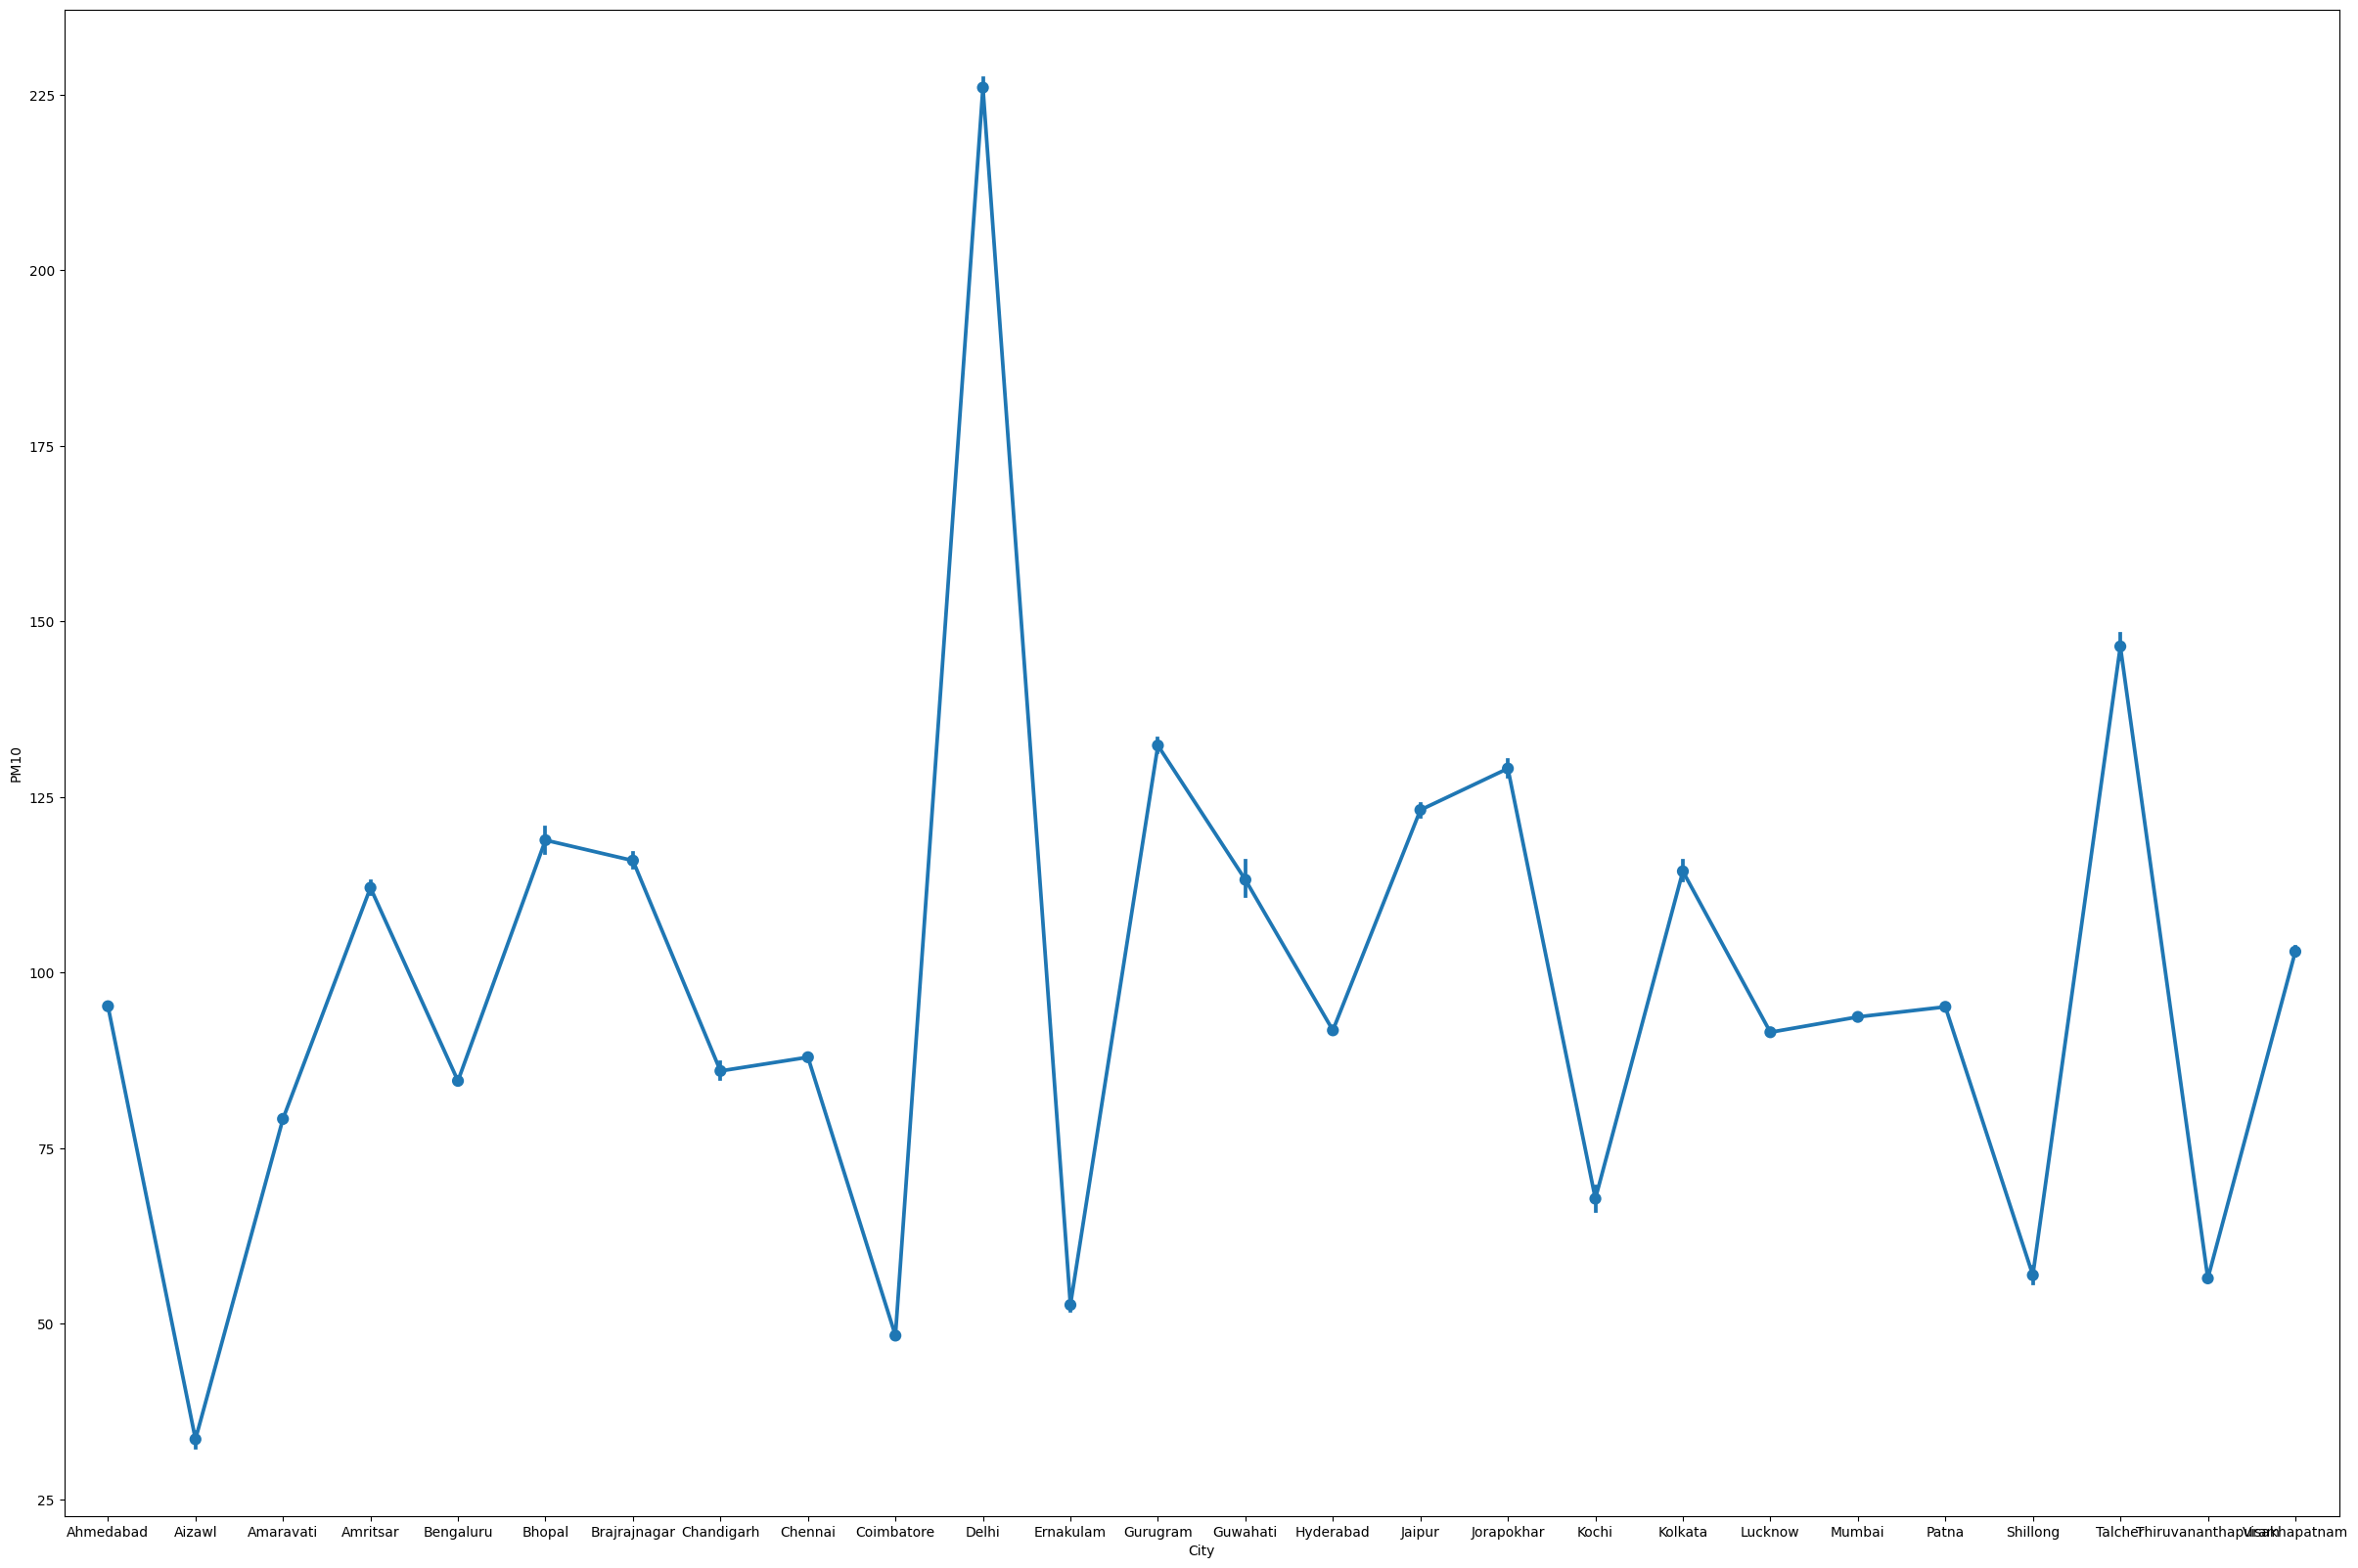

In [ ]:
import seaborn as sns
plt.figure(figsize = (30,20))

sns.pointplot(x = 'City', y = 'PM10', data = city)

<Axes: title={'center': 'PM 10 Levels in different cities'}, xlabel='Level', ylabel='City'>

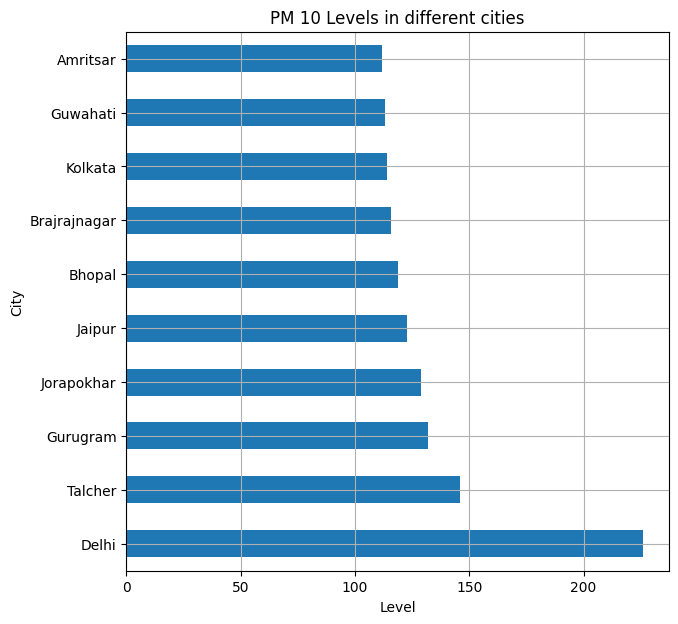

In [ ]:
pm10.sort_values(ascending=False).head(10) .plot(figsize=(7,7),
                                      kind="barh",
                                      title="PM 10 Levels in different cities",
                                      xlabel="Level", ylabel="City",grid=True)

### Which one having high max value and which having high minimum value of NO ( Nitrogen Monoxide) of each city

In [ ]:
g = city.groupby(['City']).NO.agg([min, max]).reset_index()
g

,City,min,max
0,Ahmedabad,0.01,498.57
1,Aizawl,2.74,177.22
2,Amaravati,0.03,303.50
3,Amritsar,0.04,482.28
4,Bengaluru,0.03,287.04
5,Bhopal,0.10,339.75
6,Brajrajnagar,0.01,499.52
7,Chandigarh,0.01,162.92
8,Chennai,0.01,202.49
9,Coimbatore,0.01,131.43


<Axes: title={'center': 'NO count per day in different cities'}, xlabel='Count of days', ylabel='City'>

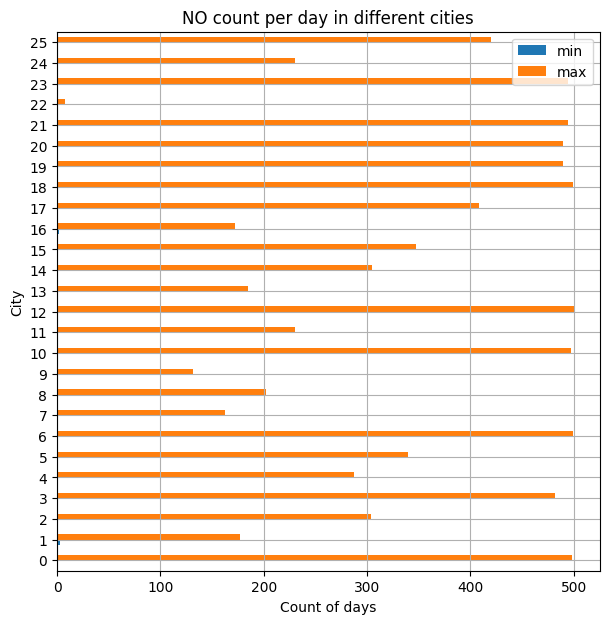

In [ ]:
g.plot(figsize=(7,7),
       kind="barh",
       title="NO count per day in different cities",
       xlabel="Count of days",
       ylabel="City",
       grid=True)

In [ ]:
# the average of NO in the air

g = city.groupby(['City']).mean()['NO'].round
g

<bound method Series.round of City
Ahmedabad             17.309997
Aizawl                 9.371873
Amaravati              4.940957
Amritsar              17.036159
Bengaluru              9.421926
Bhopal                 7.127960
Brajrajnagar          11.954677
Chandigarh            10.253288
Chennai                9.173308
Coimbatore             7.502091
Delhi                 38.813378
Ernakulam             21.158476
Gurugram              16.253963
Guwahati              19.978978
Hyderabad              7.783248
Jaipur                14.495177
Jorapokhar            10.139443
Kochi                 69.821738
Kolkata               25.959087
Lucknow               15.163272
Mumbai                16.017300
Patna                 26.739518
Shillong               2.486117
Talcher               22.982669
Thiruvananthapuram     3.776659
Visakhapatnam         11.728988
Name: NO, dtype: float64>

### Which one having high max value and which having high minimum value of NO2 ( Nitrogen Monoxide) of each city

In [ ]:
j = city.groupby(['City']).NO2.agg([min, max]).reset_index()
j

,City,min,max
0,Ahmedabad,0.01,494.15
1,Aizawl,0.01,20.32
2,Amaravati,0.10,198.05
3,Amritsar,0.01,499.51
4,Bengaluru,0.06,362.12
5,Bhopal,0.82,174.35
6,Brajrajnagar,0.01,155.82
7,Chandigarh,0.02,132.39
8,Chennai,0.05,472.53
9,Coimbatore,0.02,142.38


<Axes: title={'center': 'NO2 count per day in different cities'}, xlabel='Count of days', ylabel='City'>

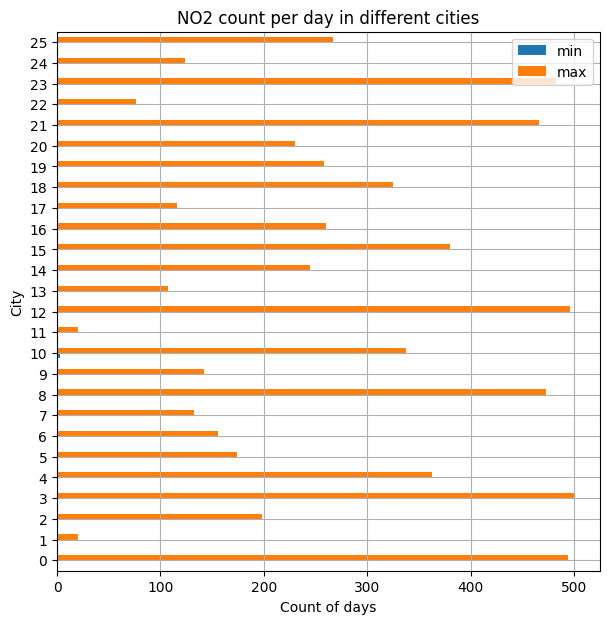

In [ ]:
j.plot(figsize=(7,7),
       kind="barh",
       title="NO2 count per day in different cities",
       xlabel="Count of days",
       ylabel="City",
       grid=True)

In [ ]:
# the average of NO2 in the air

j = city.groupby(['City']).mean()['NO2'].round
j

<bound method Series.round of City
Ahmedabad             46.346473
Aizawl                 0.764769
Amaravati             21.702598
Amritsar              18.592436
Bengaluru             27.958442
Bhopal                31.079157
Brajrajnagar          17.965328
Chandigarh            12.619463
Chennai               16.913586
Coimbatore            28.332744
Delhi                 50.555237
Ernakulam             11.069172
Gurugram              22.696841
Guwahati              13.688039
Hyderabad             28.021890
Jaipur                32.255868
Jorapokhar            13.015257
Kochi                 16.986520
Kolkata               39.782598
Lucknow               33.050044
Mumbai                22.246976
Patna                 34.404953
Shillong               6.657448
Talcher               17.077199
Thiruvananthapuram    10.168924
Visakhapatnam         33.287973
Name: NO2, dtype: float64>

### Which one having high max value and which having high minimum value of CO (Carbon Monoxide) of each city

In [ ]:
h = city.groupby(['City']).CO.agg([min, max]).reset_index()
h

,City,min,max
0,Ahmedabad,0.01,498.57
1,Aizawl,0.00,1.03
2,Amaravati,0.00,9.92
3,Amritsar,0.00,8.14
4,Bengaluru,0.00,49.96
5,Bhopal,0.09,6.90
6,Brajrajnagar,0.00,5.97
7,Chandigarh,0.00,3.41
8,Chennai,0.00,46.80
9,Coimbatore,0.00,4.06


In [ ]:
# the average of CO in the air

h = city.groupby(['City']).mean()['CO'].round
h

<bound method Series.round of City
Ahmedabad             14.684290
Aizawl                 0.287265
Amaravati              0.652245
Amritsar               0.586238
Bengaluru              1.320246
Bhopal                 0.880955
Brajrajnagar           1.602597
Chandigarh             0.635122
Chennai                1.059480
Coimbatore             0.947617
Delhi                  1.970186
Ernakulam              1.542895
Gurugram               1.148416
Guwahati               0.738277
Hyderabad              0.592642
Jaipur                 0.807170
Jorapokhar             0.757989
Kochi                  1.280205
Kolkata                0.799987
Lucknow                1.819497
Mumbai                 0.573831
Patna                  1.416756
Shillong               0.310958
Talcher                1.605071
Thiruvananthapuram     0.948862
Visakhapatnam          0.739974
Name: CO, dtype: float64>

### Which one having high max value and which having high minimum value of NOx (Nitrogen oxide) of each city

In [ ]:
k = city.groupby(['City']).NOx.agg([min, max]).reset_index()
k

,City,min,max
0,Ahmedabad,0.00,498.61
1,Aizawl,0.00,211.92
2,Amaravati,0.00,321.60
3,Amritsar,0.00,469.96
4,Bengaluru,0.00,326.40
5,Bhopal,0.00,348.85
6,Brajrajnagar,0.00,491.00
7,Chandigarh,0.00,191.16
8,Chennai,0.00,256.47
9,Coimbatore,0.00,143.97


In [ ]:
# the average of NOx in the air

k = city.groupby(['City']).mean()['NOx'].round
k

<bound method Series.round of City
Ahmedabad             38.587557
Aizawl                12.614627
Amaravati             16.015021
Amritsar              31.528799
Bengaluru             20.451970
Bhopal                22.528854
Brajrajnagar          22.632114
Chandigarh            15.589656
Chennai               17.774393
Coimbatore            30.780996
Delhi                 58.568353
Ernakulam             23.273006
Gurugram              27.116186
Guwahati              44.179510
Hyderabad             19.442063
Jaipur                37.697298
Jorapokhar            20.790000
Kochi                 67.614071
Kolkata               62.895498
Lucknow               22.521179
Mumbai                45.219335
Patna                 39.928971
Shillong               3.481082
Talcher               29.074831
Thiruvananthapuram     8.648214
Visakhapatnam         24.650465
Name: NOx, dtype: float64>

### Which city is having high AQI value

In [ ]:
aqi=city.groupby(['City']).mean()['AQI'].round()
aqi

City
Ahmedabad             333.0
Aizawl                 40.0
Amaravati              99.0
Amritsar              120.0
Bengaluru              96.0
Bhopal                133.0
Brajrajnagar          141.0
Chandigarh             97.0
Chennai               114.0
Coimbatore             80.0
Delhi                 259.0
Ernakulam              96.0
Gurugram              206.0
Guwahati              140.0
Hyderabad             110.0
Jaipur                134.0
Jorapokhar            143.0
Kochi                 105.0
Kolkata               139.0
Lucknow               211.0
Mumbai                112.0
Patna                 204.0
Shillong               76.0
Talcher               158.0
Thiruvananthapuram     79.0
Visakhapatnam         117.0
Name: AQI, dtype: float64

In [ ]:
aqi.sort_values(ascending=False).head(10)

City
Ahmedabad       333.0
Delhi           259.0
Lucknow         211.0
Gurugram        206.0
Patna           204.0
Talcher         158.0
Jorapokhar      143.0
Brajrajnagar    141.0
Guwahati        140.0
Kolkata         139.0
Name: AQI, dtype: float64

<Axes: title={'center': 'Top 10 AQI values'}, xlabel='Level', ylabel='City'>

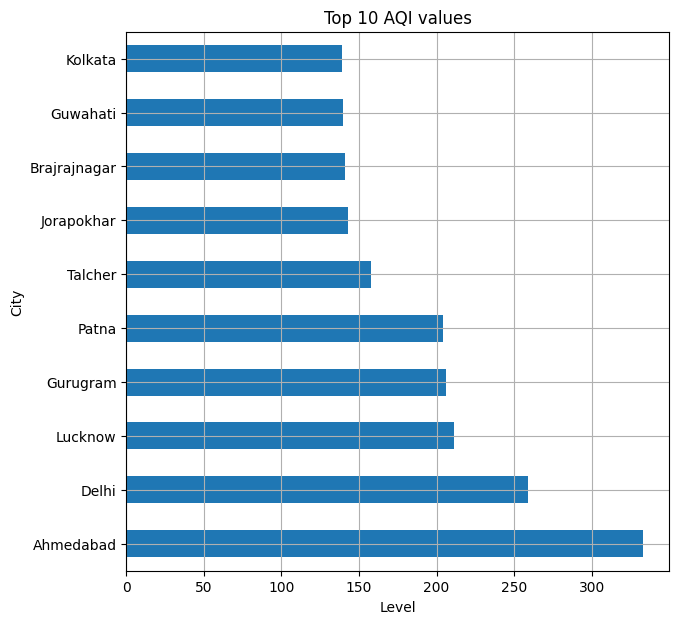

In [ ]:
aqi.sort_values(ascending=False).head(10) .plot(figsize=(7,7),
                                                kind="barh",
                                                title="Top 10 AQI values",
                                                xlabel="Level",
                                                ylabel="City",
                                                grid=True)

<Axes: xlabel='City', ylabel='AQI'>

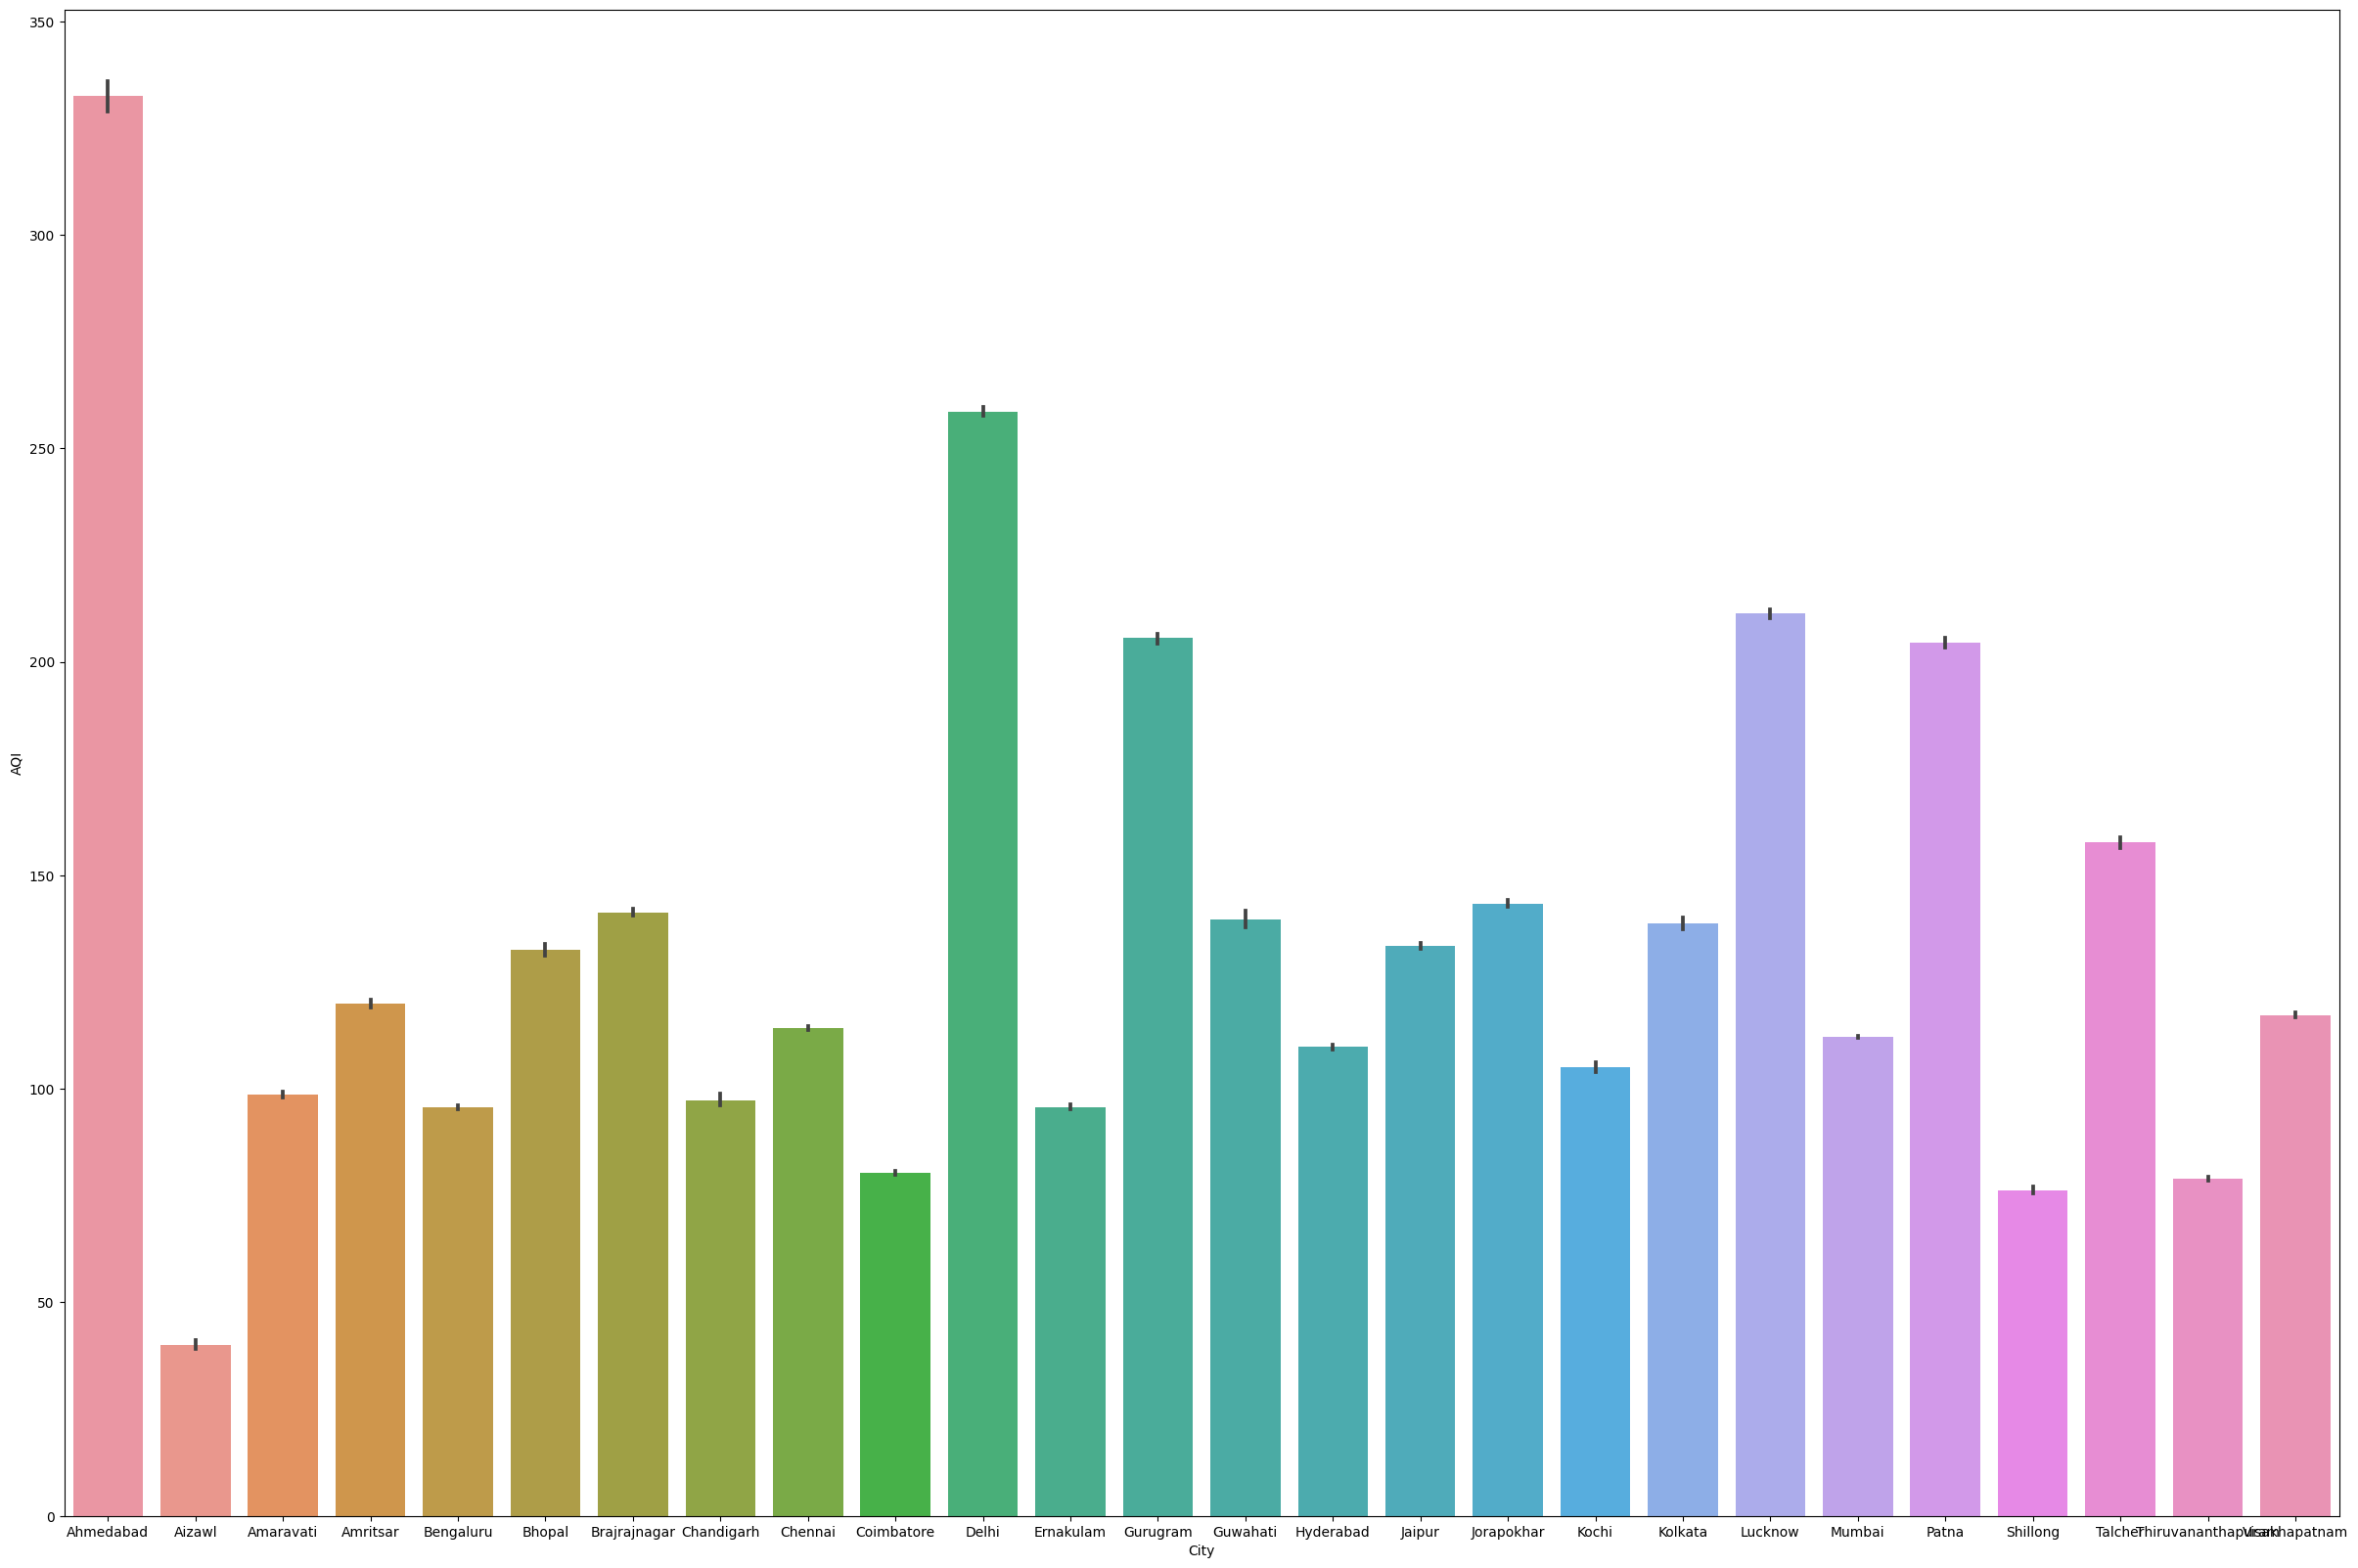

In [ ]:
import seaborn as sns
plt.figure(figsize = (30,20))

sns.barplot(x = 'City', y = 'AQI', data = city)

### Which year is having high AQI

In [ ]:
years=city.groupby(['year']).mean()['AQI'].round()
years

year
2015    176.0
2016    173.0
2017    159.0
2018    174.0
2019    154.0
2020    114.0
Name: AQI, dtype: float64

<Axes: title={'center': 'AQI values by years'}, xlabel='Level', ylabel='Year'>

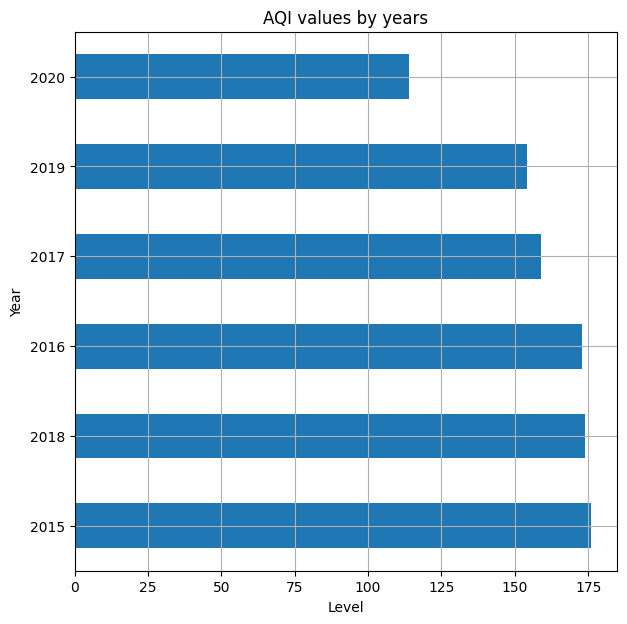

In [ ]:
years.sort_values(ascending=False).head(10) .plot(figsize=(7,7),
                                                  kind="barh",
                                                  title="AQI values by years",
                                                  xlabel="Level",
                                                  ylabel="Year",
                                                  grid=True)

### Month

In [ ]:
moon=city.groupby(['month']).mean()['AQI'].round()
moon

month
1     209.0
2     188.0
3     155.0
4     138.0
5     132.0
6     119.0
7     113.0
8     114.0
9     116.0
10    174.0
11    223.0
12    208.0
Name: AQI, dtype: float64

<Axes: title={'center': 'AQI index month wise'}, xlabel='Month', ylabel='AQI'>

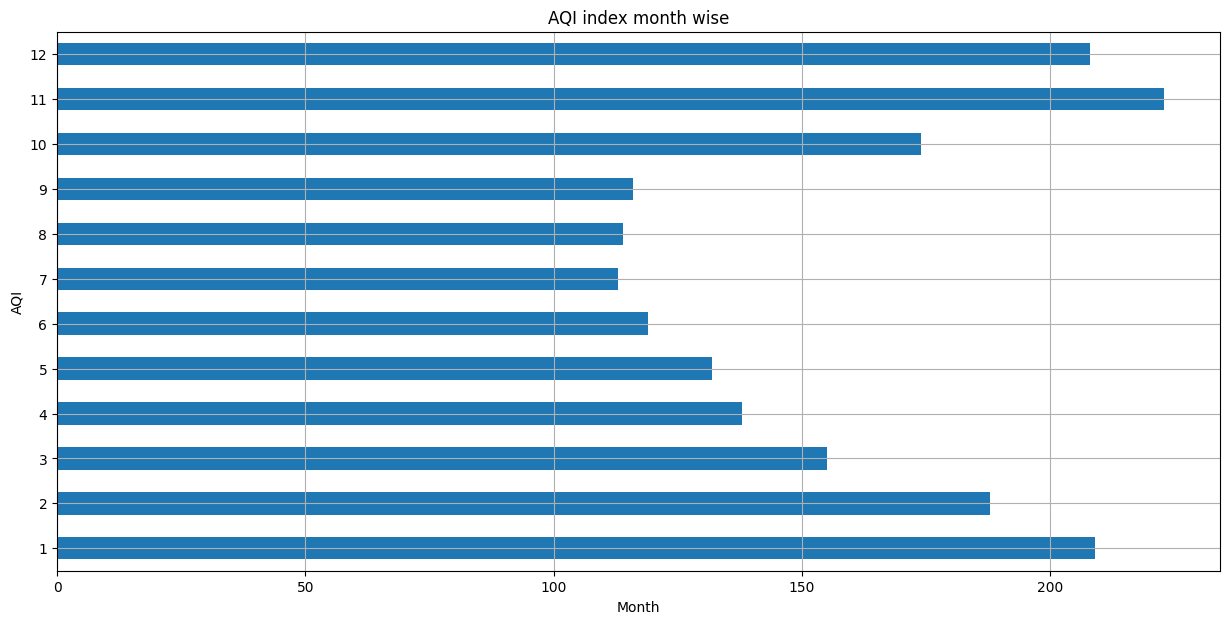

In [ ]:
moon.plot(figsize=(15,7),
          kind="barh",
          title="AQI index month wise",
          xlabel="Month",
          ylabel="AQI",
          grid=True)

<Axes: xlabel='month', ylabel='AQI'>

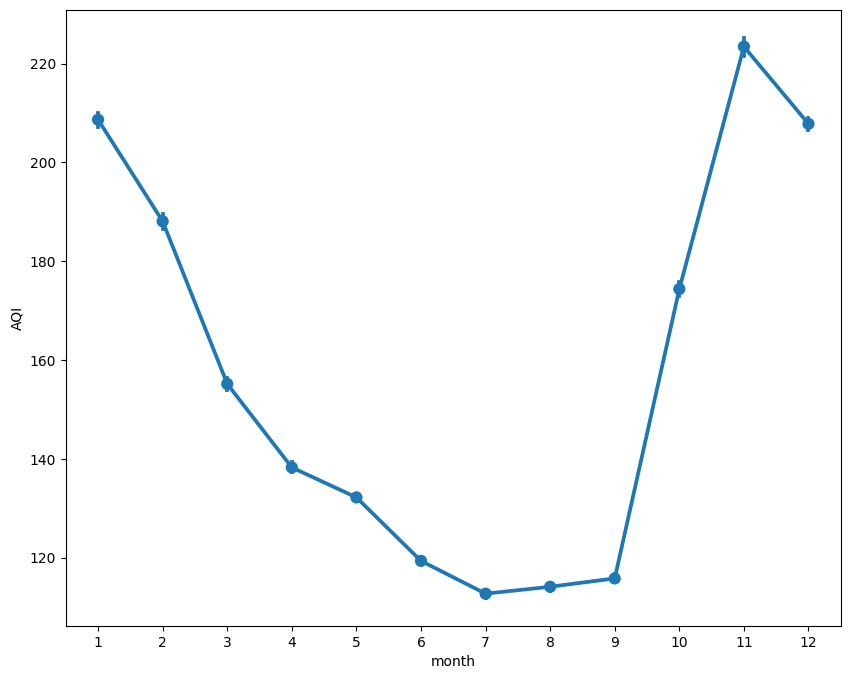

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,8))

sns.pointplot(x = 'month', y = 'AQI', data = city)

<Axes: >

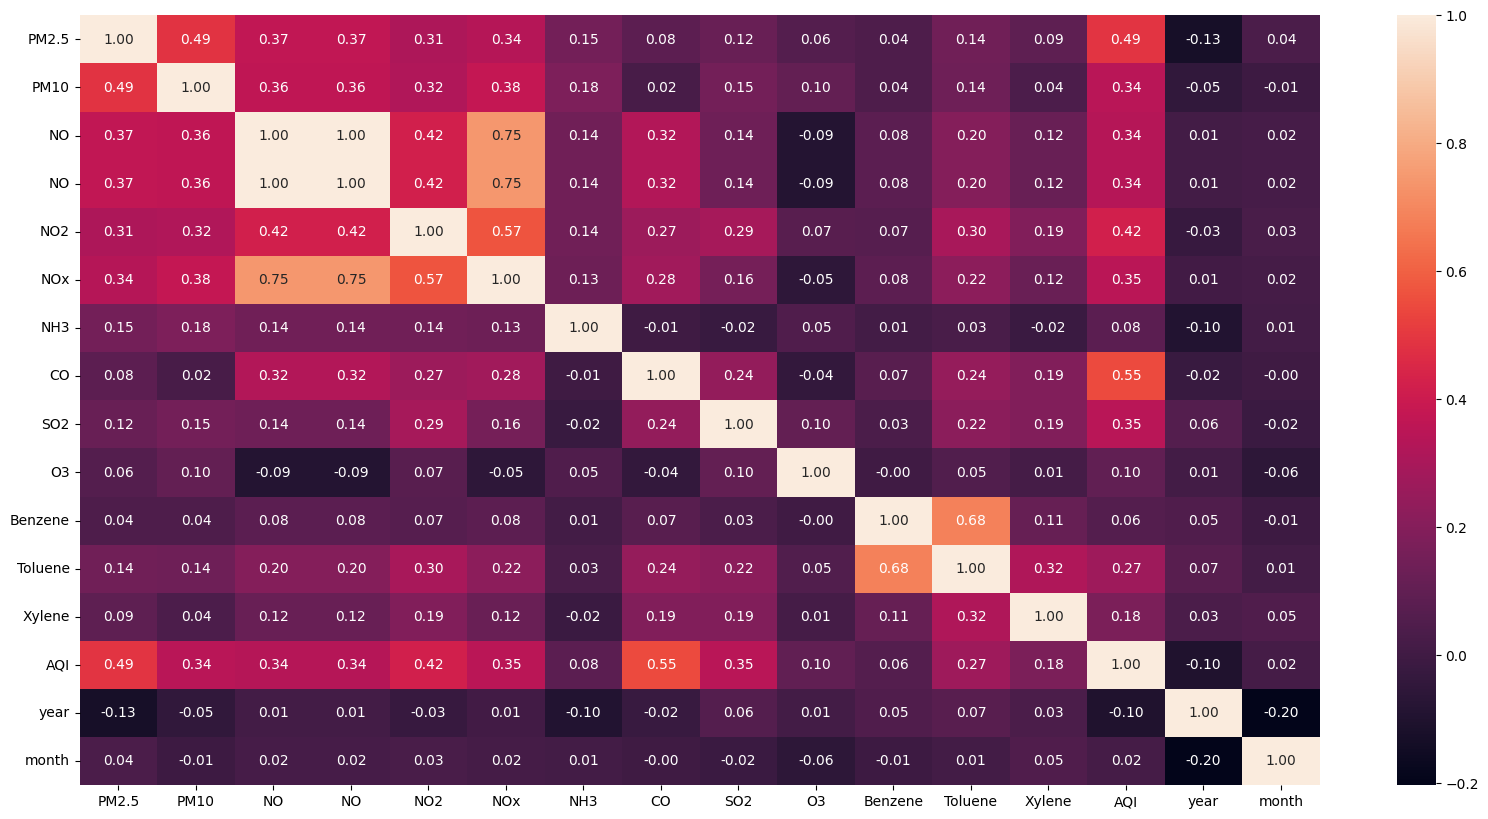

In [ ]:
plt.figure(figsize=(20,10))
correlation = city[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

## Feature + Target

In [ ]:
elements= ['PM2.5', 'PM10', 'NO', 'NO', 'NO2', 'NOx',
              'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
              'Xylene']

## MODELING

## Logistic Regression

### Feature Elements

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

## X = feature
## y = target
X = city[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
          'O3', 'Benzene', 'Toluene', 'Xylene']]

y = city[['AQI_lencode']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

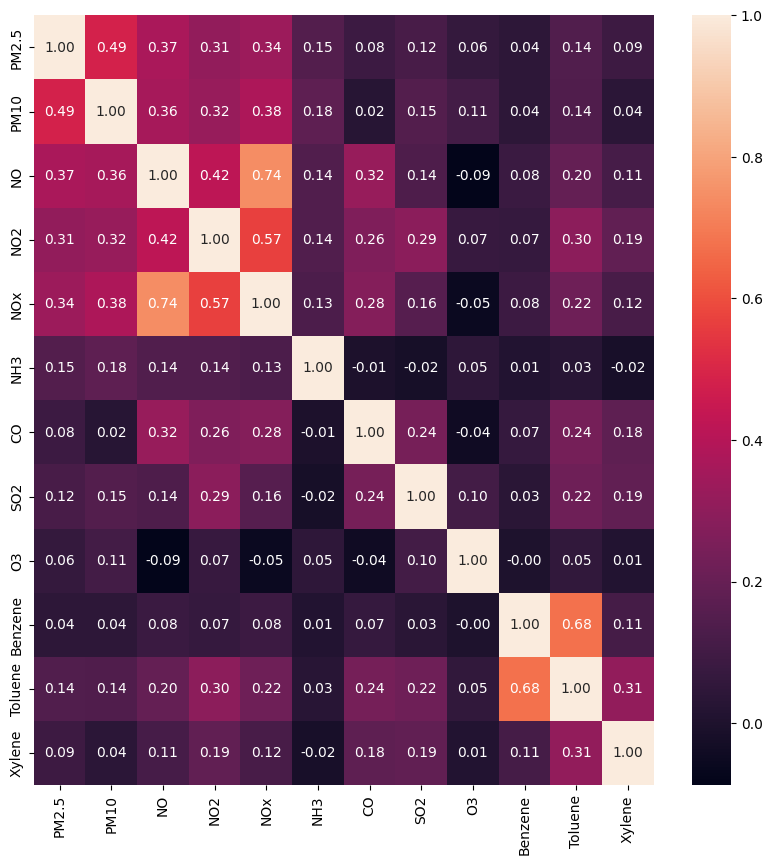

In [ ]:
# heatmap corr

admit_train = pd.concat([X_train, y_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
city['AQI_lencode'].value_counts()

4.0    385526
5.0    189434
3.0     66654
6.0     38611
1.0     27650
Name: AQI_lencode, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([4., 4., 4., ..., 4., 4., 4.])

In [ ]:
print('Logistic Regression',accuracy_score(y_test, y_pred_reg))

Logistic Regression 0.5737312378597916


In [ ]:
print(classification_report(y_test, y_pred_reg, digits=6))

              precision    recall  f1-score   support

         1.0   0.507242  0.334276  0.402983      5657
         3.0   0.154255  0.002178  0.004295     13315
         4.0   0.585994  0.930779  0.719199     77000
         5.0   0.497586  0.201965  0.287313     37764
         6.0   0.346154  0.001148  0.002289      7839

    accuracy                       0.573731    141575
   macro avg   0.418246  0.294069  0.283216    141575
weighted avg   0.505381  0.573731  0.484430    141575



## city + elements

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

## X = feature
## y = target
X = city[['city_lencode', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
          'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]

y = city[['AQI_lencode']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([4., 4., 4., ..., 4., 4., 4.])

In [ ]:
print(classification_report(y_test, y_pred_reg, digits=6))

              precision    recall  f1-score   support

         1.0   0.574158  0.403748  0.474105      5657
         3.0   0.027027  0.000075  0.000150     13315
         4.0   0.611408  0.928792  0.737399     77000
         5.0   0.564036  0.306244  0.396959     37764
         6.0   0.188235  0.002041  0.004038      7839

    accuracy                       0.603094    141575
   macro avg   0.392973  0.328180  0.322530    141575
weighted avg   0.518892  0.603094  0.526125    141575



### Feature NO

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## X = feature
## y = target
X = city[['NO']]

y = city[['AQI_Bucket']]

X_train_NO, X_test_NO, y_train_NO, y_test_NO = train_test_split(X,
                                                            y,
                                                            test_size=0.20,
                                                            random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_NO, y_train_NO)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regNO = logreg.predict(X_test_NO)
y_pred_regNO

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print('Logistic Regression',accuracy_score(y_test_NO, y_pred_regNO))

Logistic Regression 0.46426982164930247


In [ ]:
print(classification_report(y_test_NO, y_pred_regNO, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.467211  0.990161  0.634860     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.406475  0.039951  0.072751      5657
   Very Poor   0.300870  0.059939  0.099964     11545

    accuracy                       0.464270    141575
   macro avg   0.195759  0.181675  0.134596    141575
weighted avg   0.256784  0.464270  0.304577    141575



### Feature NO2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## X = feature
## y = target
X = city[['NO2']]

y = city[['AQI_Bucket']]

X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_NO2, y_train_NO2)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regNO2 = logreg.predict(X_test_NO2)
y_pred_regNO2

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print('Logistic Regression',accuracy_score(y_test_NO2, y_pred_regNO2))

Logistic Regression 0.4659509094119725


In [ ]:
print(classification_report(y_test_NO2, y_pred_regNO2, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.468837  0.989840  0.636294     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.448584  0.106417  0.172025      5657
   Very Poor   0.281863  0.049805  0.084652     11545

    accuracy                       0.465951    141575
   macro avg   0.199881  0.191010  0.148828    141575
weighted avg   0.257669  0.465951  0.307957    141575



### Feature NOx

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## X = feature
## y = target
X = city[['NOx']]

y = city[['AQI_Bucket']]

X_train_NOx, X_test_NOx, y_train_NOx, y_test_NOx = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_NOx, y_train_NOx)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regNOx = logreg.predict(X_test_NOx)
y_pred_regNOx

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print('Logistic Regression',accuracy_score(y_test_NOx, y_pred_regNOx))

Logistic Regression 0.46227794455235743


In [ ]:
print(classification_report(y_test_NOx, y_pred_regNOx, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.465308  0.989306  0.632926     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.302583  0.028991  0.052912      5657
   Very Poor   0.282807  0.045734  0.078735     11545

    accuracy                       0.462278    141575
   macro avg   0.175116  0.177338  0.127429    141575
weighted avg   0.250280  0.462278  0.301158    141575



### Feature Benzene

In [ ]:
## X = feature
## y = target
X = city[['Benzene']]

y = city[['AQI_Bucket']]

X_train_ben, X_test_ben, y_train_ben, y_test_ben = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_ben, y_train_ben)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regben = logreg.predict(X_test_ben)
y_pred_regben

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print(classification_report(y_test_ben, y_pred_regben, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.463744  0.997281  0.633093     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.155750  0.002833  0.005566     37764
      Severe   0.000000  0.000000  0.000000      5657
   Very Poor   0.000000  0.000000  0.000000     11545

    accuracy                       0.461833    141575
   macro avg   0.103249  0.166686  0.106443    141575
weighted avg   0.255950  0.461833  0.294185    141575



### Feature Toluene

In [ ]:
## X = feature
## y = target
X = city[['Toluene']]

y = city[['AQI_Bucket']]

X_train_tn, X_test_tn, y_train_tn, y_test_tn = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_tn, y_train_tn)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regtn = logreg.predict(X_test_tn)
y_pred_regtn

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print(classification_report(y_test_tn, y_pred_regtn, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.466018  0.993614  0.634464     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.368870  0.030582  0.056481      5657
   Very Poor   0.220427  0.029537  0.052093     11545

    accuracy                       0.463013    141575
   macro avg   0.175886  0.175622  0.123840    141575
weighted avg   0.248170  0.463013  0.299839    141575



### Feature Xylene

In [ ]:
## X = feature
## y = target
X = city[['Xylene']]

y = city[['AQI_Bucket']]

X_train_xy, X_test_xy, y_train_xy, y_test_xy = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_xy, y_train_xy)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regxy = logreg.predict(X_test_xy)
y_pred_regxy

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print(classification_report(y_test_xy, y_pred_regxy, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.462829  0.998701  0.632526     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.416216  0.013611  0.026361      5657
   Very Poor   0.140000  0.001819  0.003591     11545

    accuracy                       0.462426    141575
   macro avg   0.169841  0.169022  0.110413    141575
weighted avg   0.242029  0.462426  0.293785    141575



### Feature NH3

In [ ]:
## X = feature
## y = target
X = city[['NH3']]

y = city[['AQI_Bucket']]

X_train_NH, X_test_NH, y_train_NH, y_test_NH = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_NH, y_train_NH)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regNH = logreg.predict(X_test_NH)
y_pred_regNH

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print(classification_report(y_test_NH, y_pred_regNH, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.462228  0.997693  0.631762     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.000000  0.000000  0.000000      5657
   Very Poor   0.023810  0.000606  0.001183     11545

    accuracy                       0.461317    141575
   macro avg   0.081006  0.166383  0.105491    141575
weighted avg   0.215645  0.461317  0.292182    141575



### Feature CO

In [ ]:
## X = feature
## y = target
X = city[['CO']]

y = city[['AQI_Bucket']]

X_train_CO, X_test_CO, y_train_CO, y_test_CO = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_CO, y_train_CO)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regCO = logreg.predict(X_test_CO)
y_pred_regCO

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print(classification_report(y_test_CO, y_pred_regCO, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.470604  0.992376  0.638445     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.702931  0.250133  0.368970      5657
   Very Poor   0.342671  0.045561  0.080428     11545

    accuracy                       0.472520    141575
   macro avg   0.252701  0.214678  0.181307    141575
weighted avg   0.273607  0.472520  0.316477    141575



### Feature SO2

In [ ]:
## X = feature
## y = target
X = city[['SO2']]

y = city[['AQI_Bucket']]

X_train_SO, X_test_SO, y_train_SO, y_test_SO = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_SO, y_train_SO)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regSO = logreg.predict(X_test_SO)
y_pred_regSO

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print(classification_report(y_test_SO, y_pred_regSO, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.464659  0.993186  0.633116     65455
        Poor   0.000000  0.000000  0.000000     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.363909  0.107301  0.165734      5657
   Very Poor   0.000000  0.000000  0.000000     11545

    accuracy                       0.463472    141575
   macro avg   0.138095  0.183414  0.133142    141575
weighted avg   0.229369  0.463472  0.299334    141575



### Feature O3

In [ ]:
## X = feature
## y = target
X = city[['O3']]

y = city[['AQI_Bucket']]

X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(X,
                                                            y,
                                                            test_size=0.20,
                                                            random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_O, y_train_O)

LogisticRegression(random_state=42)

In [ ]:
y_pred_regO = logreg.predict(X_test_O)
y_pred_regO

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
print(classification_report(y_test_O, y_pred_regO, digits=6))

              precision    recall  f1-score   support

        Good   0.000000  0.000000  0.000000      7839
    Moderate   0.462422  0.999985  0.632403     65455
        Poor   0.068966  0.000150  0.000300     13315
Satisfactory   0.000000  0.000000  0.000000     37764
      Severe   0.000000  0.000000  0.000000      5657
   Very Poor   0.000000  0.000000  0.000000     11545

    accuracy                       0.462342    141575
   macro avg   0.088565  0.166689  0.105450    141575
weighted avg   0.220280  0.462342  0.292410    141575



## Random Forest with Imbalance Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## X = feature
## y = target
X = city[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
          'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = city[['AQI_lencode']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

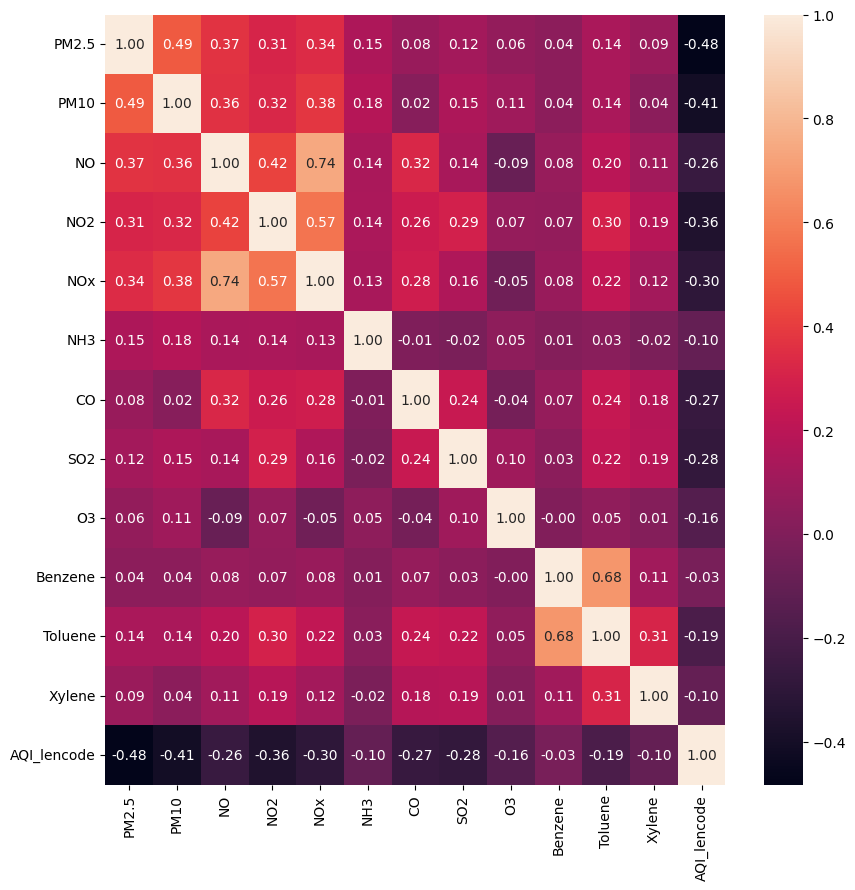

In [ ]:
admit_train = pd.concat([X_train, y_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


In [ ]:
## X = feature
## y = target
X = city[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
          'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = city[['AQI_lencode']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
preds = model.predict(X_test)
preds

array([5., 4., 4., ..., 5., 4., 5.])

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [ ]:
cm = confusion_matrix(y_test, preds)
cm

array([[ 4549,   149,  2298,    60,    17],
       [  169,  6478,  9381,   639,    65],
       [  960,  1895, 85534,  7491,   348],
       [    3,    57,  8242, 37599,  1302],
       [    2,     4,   426,  3272,  6029]])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits=6))


              precision    recall  f1-score   support

         1.0   0.800458  0.643150  0.713233      7073
         3.0   0.754748  0.387162  0.511791     16732
         4.0   0.807831  0.888868  0.846415     96228
         5.0   0.766372  0.796538  0.781164     47203
         6.0   0.776833  0.619439  0.689265      9733

    accuracy                       0.792167    176969
   macro avg   0.781248  0.667032  0.708374    176969
weighted avg   0.789755  0.792167  0.783407    176969



### city + elements

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## X = feature
## y = target
X = city[['city_lencode','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
          'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = city[['AQI_lencode']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
preds = model.predict(X_test)
preds

array([5., 4., 4., ..., 5., 4., 5.])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits=6))

              precision    recall  f1-score   support

         1.0   0.800384  0.647957  0.716150      7073
         3.0   0.756807  0.413639  0.534915     16732
         4.0   0.814205  0.891819  0.851247     96228
         5.0   0.776613  0.803826  0.789985     47203
         6.0   0.783546  0.631152  0.699141      9733

    accuracy                       0.799055    176969
   macro avg   0.786311  0.677679  0.718288    176969
weighted avg   0.796513  0.799055  0.791233    176969



## Decision Tree

In [ ]:

## X = feature
## y = target
X = city[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
          'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]

y = city[['AQI_lencode']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_std,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([4., 4., 4., ..., 5., 4., 4.])

In [ ]:
print(classification_report(y_test, y_pred_dt, digits=6))

              precision    recall  f1-score   support

         1.0   0.599571  0.592894  0.596214      5657
         3.0   0.428255  0.435749  0.431970     13315
         4.0   0.771900  0.777143  0.774513     77000
         5.0   0.686758  0.672519  0.679564     37764
         6.0   0.583050  0.589744  0.586377      7839

    accuracy                       0.699389    141575
   macro avg   0.613907  0.613610  0.613727    141575
weighted avg   0.699527  0.699389  0.699428    141575



### elements + city

In [ ]:

## X = feature
## y = target
X = city[['city_lencode', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
          'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]

y = city[['AQI_lencode']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_std,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([4., 4., 3., ..., 4., 3., 4.])

In [ ]:
print(classification_report(y_test, y_pred_dt, digits=6))

              precision    recall  f1-score   support

         1.0   0.604474  0.601909  0.603189      5657
         3.0   0.448304  0.447766  0.448035     13315
         4.0   0.778236  0.785948  0.782073     77000
         5.0   0.697144  0.684461  0.690744     37764
         6.0   0.601435  0.598673  0.600051      7839

    accuracy                       0.709348    141575
   macro avg   0.625919  0.623752  0.624818    141575
weighted avg   0.708843  0.709348  0.709070    141575

